**Fall 2019**

**P556: Applied Machine Learning**

**Assignment #1**

**Due date: September 18, 2019. 11:59 PM**

DO NOT CHANGE THE FUNCTION DEFINITIONS UNLESS APPROVED BY AN AI.

# Problem #1: Linear Regression

##  Problem 1.1 (25 points)

Implement linear regression using gradient descent. Your implementation should be able to handle simple and multiple linear regression.

Note 1: by implementation we mean that everything has to be written from scratch and that you cannot call a linear regression function from a library, such as sklearn. Usage of standard libraries, such as numpy, pandas, etc., is fine. If you are unsure about whether a library can be used, please contact the AIs well in advance of the submission date.

Note 2: You are free to use sklearn to test whether your results match that from a battle-tested library. This is a great way to know before hand whether your submission is correct. Make sure to use the same parameters on both models before you spend an eternity debugging code that is correct but not returning the same values.

In [240]:
import numpy as np

class linear_regression:
  def __init__(self, learning_rate, iterations, 
               fit_intercept=True, normalize=False, coef=None):
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.coef = coef
  
  def fit(self, X, y):
        
    
    """
    Fit linear model.
    Parameters
    ----------
    X : array-like, shape (n_samples, n_features)
        Training data
    y : array_like, shape (n_samples, n_targets)
        Target values.
    """
    global coef
    coef=[0]*(X.shape[1] +1)
    y_pred=[]

    #Scaling Features
    X=(X-np.mean(X))/(np.amax(X)-np.amin(X))

    iterations=1000
    for a in range(iterations):
    # Predicting y values
            y_pred.clear()

            for i in range(X.shape[0]):
                    y_value=coef[0]
                    for j in range(X.shape[1]):
                            y_value+=(coef[j+1]*X[i][j])

                    y_pred.append(y_value)

    #differentiate wrt coeff(x)
            learning_rate=0.009
            for i in range(X.shape[1]):
                    diff=0
                    for j in range(X.shape[0]):
                            diff+=((y_pred[j]-y[j])*X[j][i])

                    coef[i+1]-=((2*learning_rate*diff)/(X.shape[0]))

    ###diff wrt const
            coef[0]-=((learning_rate*(sum(y_pred)-sum(y)))/(y.shape[0]))

    return coef

    pass
  
  def predict(self, X):
    """Predict using the linear model
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    Returns
    -------
    C : array, shape (n_samples,)
        Returns predicted values.
    """
    X=(X-np.mean(X))/(np.amax(X)-np.amin(X))
    y_pred=[]
    y_value=0
    for i in range(X.shape[0]):
        y_value=coef[0]
        for j in range(X.shape[1]):
            y_value+=(coef[j+1]*X[i][j])

        y_pred.append(y_value)
    return (y_pred)
    pass

## Problem 1.2 (10 points)

- Split the Boston Housing dataset into train and test sets (70% and 30%, respectively) (5 points). 
- Fit your linear regression implementation using the training set and print your model's coefficients. Make predictions for the test set using your fitted model (5 points).

In [245]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Your code goes here
data = load_boston()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.3)

coeff=linear_regression.fit([],X_train,y_train)
print(coeff)
y_pred=linear_regression.predict([],X_test)


[14.869071346692511, -3.461846867773545, -0.48505219796662086, -3.1812604371930893, -2.918811904993972, -2.9230345571483096, -2.556708306514344, -2.479697930816392, -2.6567072171501653, -3.216209187020788, -2.6818582177877492, -2.4158273154393126, 15.969583904668855, -3.647328773541412]


## Problem 1.3 (10 points)

Identify the variable or set of variables that will minimize the mean square error (MSE). Hint: this is where your function being able to handle simple and multiple regression becomes useful.

In [247]:
from sklearn.metrics import mean_squared_error

m = (mean_squared_error(y_test,y_pred))
print (m)
 

57.09596738314557


## Problem 1.4 (5 points)

1. How do you interpret that a variable causes a model's mean square error to increase? (2 points)
  - Answer: Mean Squared Error is a method of evaluating a model. It measures the total deviation of the predicted values from the actual target values. Some variables cause a huge change in the MSE depending on how the value of those variables contribute in the target values and ultimately the MSE. Also, if a feature impacts the target values significantly and its values are spread over a huge range making its variance high, the MSE will increase.
  
2. Why we would want to normalize our variables? (1 point)
  - Answer: Normalization is the process by which the entire dataset is converted to a common range. When the features of the dataset have a huge difference in their scales, they may show irrelevant impact on the target values. Thus, after normalization when all the dataset are in the same scale, all the features are given same weightage.
  
3. A model fitted using the exact same split dataset with normalized values will generate the same coefficients as a model that was fitted using values that haven't been normalized. Clearly state whether that statement is true or false and explain your reasoning. (2 points)
  - Answer: False. 
            When features are normalized, the coefficients that the model gives after fitting changes as compared with the coefficients returned when the features are'nt normalized. This is because before normalization, the values of all one feature maybe ranging between very small values (eg. in Boston Housing Price data, the value of crim ranges from 0.01 to 15. While those in tax are well above 200). These features have different impact on the target values i.e. even a insignificant change in smaller valued feature may have a significant impact on the target values which is represented by the coefficients.
            After normalization, the entire dataset is converted to a singe scale. Thus, all the features show the same impact on the target values, thus changing the coefficient values.

# Problem 2: Binary Classification

## Problem 2.1 (5 points)

Consider the binary classification problem of mapping a given input to two classes. Let $\mathcal{X}=\mathbb{R}^d$ and $\mathcal{Y}=\{+1, -1\}$ be the input space and output space, respectively. In simple words, it means that the input has $d$ features and all of them are real valued, whereas the output can only take values $-1$ or $+1$. This is one of the most common problems in machine learning and many sophisticated methods exist to solve it. In the question, we will solve it using the concepts we have already learned in class. Let us assume the two sets of points can be separated using a straight line i.e. the samples are linearly separable. So if $d=2$, one should be able to draw a line to distinguish between the two classes. All points lying on side of the line should belong to a particular class (say $1$) and the points lying on the other side should belong to another class (say $2$). To see what this would look like,  your first task is as follows:

Write a function that will randomly generate a dataset for this problem. Your function should randomly choose a line $l$, which can be denoted as $ax + by + c = 0$. According to basic high school geometry, the line divides the plane into two sides. On one side, $ax+by+c>0$ while on the other $ax+by+c<0$. Use this fact to randomly generate $k_0$ points on the side of class 0 (i.e. $y=-1$) and $k_1$ points on the side of class 1 (i.e. $y=1$). Create a plot of this dataset where all the points corresponding to one class are blue and those of the other class are green, the line dividing both classes should be red. Axes should be labeled.

**Note**: Do not confuse the $x$ and $y$ in the equation of line $ax + by + c = 0$ with $\mathcal{X} $ and $\mathcal{Y}$. Instead imagine these $x$ and $y$ as the 2-D coordinate system on which you have different points which should lie on 2 sides of the line $ax + by + c = 0$. For example, there is a point (2,3) in the 2-D system where $x = 2$ and $y = 3$.

In [3]:
def generate_dataset(k0, k1):
    """
    Parameters
    ----------
    k0 : integer, number of samples for class 0
    k1 : integer, number of samples for class 1
    
    Returns
    -------
    X : array, shape (m, d), dimension numpy array where m is the number of 
    samples and d is the number of features 

    Y : array, (m, 1), dimension vector where m is the number of samples
    """
    from matplotlib import pyplot as plt
    import random
    import numpy as np
    n=k0+k1
    a=random.randint(-10,10)
    b=random.randint(-10,10)
    while b==0:
            b=random.randint(-10,10)
    c=random.randint(-10,10)
    print(a,b,c)
    

    Xp=[0]*n
    yp=[0]*n
    y=[0]*n
    X=[(0,0)]*n
    index=[]
    class0=[]
    while len(class0)<k0:
            j=random.randint(0,n-1)
            if j not in index:
                    pnt_x=random.randint(-100,100)
                    pnt_y=random.randint(-100,100)
                    if ((a*pnt_x)+(b*pnt_y)+c)<0:
                            class0.append(j)
                            index.append(j)
                            Xp[j]=pnt_x
                            yp[j]=pnt_y
                            y[j]=-1
                            X[j]=(Xp[j],yp[j])

    class1=list(range(n))
    for i in class0:
            class1.remove(i)
    class10=list(range(n))
    for i in class0:
            class10.remove(i)

    while len(class10)>0:
            pnt_x=random.randint(-100,100)
            pnt_y=random.randint(-100,100)
            if ((a*pnt_x)+(b*pnt_y)+c)>0:
                    j =class10.pop()
                    Xp[j]=pnt_x
                    yp[j]=pnt_y
                    y[j]=1  
                    X[j]=(Xp[j],yp[j])


    for i in class0:
            plt.scatter(Xp[i],yp[i],color='green')
    

    for i in class1:
            plt.scatter(Xp[i],yp[i],color='blue')
    x = np.linspace(min(Xp)-20,max(Xp)+20,10)
    yline = (a*x+c)/(-1*b)
    plt.plot(x, yline, '-r')
    plt.show()
    
    return X,y
    pass


## Problem 2.2 (35 points)

If $\mathcal{Y}$ is the variable you are trying to predict using a feature $\mathcal{X}$ then in a typical Machine Learning problem, you are tasked with a target function $f$ which maps $\mathcal{X}$ to $\mathcal{Y}$ i.e. Find $f$ such that  $\mathcal{Y}$  = $f(\mathcal{X})$


When you are given a dataset for which you do not have access the target function $f$, you have to learn it from the data. In this problem, we are going to learn the parameters of the line that separates the two classes for the dataset that we constructed in Problem 2.1. As we previously mentioned, that line can be represented as $ax + by + c = 0$.

The goal here is to correctly find out the coefficients $a$, $b$, and $c$, represented below as $\bf{w}$ which is a vector. The algorithm to find it is a simple iterative process: 

1. Randomly choose a $\mathbf{w}$ to begin with.
2. Keep on adjusting the value of $\bf{w}$ as follows until all data samples are correctly classified:
    1. Randomly choose a sample from the dataset without replacement and see if it is correctly classified. If yes,  move on to another sample.
    2. If not,  then  update the weights as $\mathbf{w}^{t+1} = \mathbf{w}^t + y \cdot \mathbf{x}$
    and go back to the previous step (of randomly chosing a sample)
    
        - $\mathbf{w}^{t+1}$ is value of $\mathbf{w}$ at iteration $t+1$
        - $\mathbf{w}^{t}$ is value of $\mathbf{w}$ at iteration $t$
        - $y$ is the class label for the sample under consideration
        - $\mathbf{x}$ is the data-point under consideration
    
    
Write a function that implements this learning algorithm. The input to the function is going to be a dataset represented by the input variable $X$ and the target variable $y$. The output of the function should be the chosen $\mathbf{w}$.



-10 4 -4


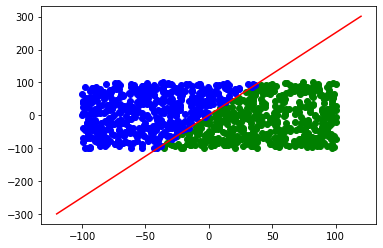

[-343, 65]


In [248]:
def fit_line(X, y):
    
    
    """Predict using the binary classification model. Use the dataset generated 
    using generate_data() as input for this function.
    
    Parameters
    ----------
    X : array_like, shape (n_samples, n_features)
        Samples.
    y : array_like, shape (n_labels, 1)
    
    Returns
    -------
    w : array, shape (1,n_features)
        Returns the final weight vector w.  
    """
    import numpy as np
    import random
    import pandas as pd
    y_pred=[0]*len(y)
    w=[]
    for i in range(len(X[0])):
        w.append(random.randint(-100,100))
    row=list(range(len(y)))
    while len(row)>0:
        i=random.choice(row)
        if i in row:
            y_val=0
            for j in range(len(X[0])):
                y_val+=w[j]*X[i][j]
            if y_val<0:
                y_pred[i]=-1
            else:
                y_pred[i]=1
            if y_pred[i]!=y[i]:
                for j in range(len(X[0])):
                    w[j]+=y[i]*X[i][j]
            else:
                row.remove(i)

    return w                                
pass
a,b=generate_dataset(500,500)
m=fit_line(a,b)
print(m)

### Problem 2.3 (10 points)
- Give an intuition of why the above algorithm converges for linearly separable data? We do not expect you to give a mathematic proof, but it would be great if you can provide one. You will get full points even if you just provide an intuition of a few lines. Including figures or mathematical equations is encouraged but not required. (5 points)

  - Answer: In the the above algorithm, the class lable is obtained by multiplying all the features with the weight vector. If the summation gives a value greater than 0, the tuple is classified as belonging to class 1 i.e y=1. If the class lable obtained matches with the true class lable, the weight vector is retained for further classifications. If the predicted class lable does not match with the true class lable, the weigt vector is changed as follows:
          𝐰[𝑡+1]=𝐰[𝑡]+𝑦⋅𝐱, where w[t] is the current value.
    This process is repeated for all the tuples presengt in the features. The value of the weight vector is updated every time the predicted class lable does not match the true lable. Since the weigt vector updataes itslef for each and every wrong classification, it is able to converge for a linearly seperable data in finite moves.
    The weight vector after a finite number of updates which is defined by the upper and the lower bounds of the data set is able to classify all the datapoints into their respective class.
    The class lables predicted depends on the dot product of the weight vector and the X, the cosine of the angle between them is dependent on the dot product. Since, the cosine takes positive value when angle is less than 90 and negative when angle greater than 90, all the data points can be classified into two classes and hence the model converges after a finite updates.

- What happens when the data is not linearly separable? What can be done to salvage the situation?

  - Answer: In case of non-linearly separable dataset, the classification model goes into an infite loop. all the points cannot be classified as the angle in non-linearly separable dataset, the dot product does not take any specific values depending on the cosine of the angle that varies from 0 to 360. thus the classification model does not converge for non-linearly separable data.